# Logistic regression

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
import datetime as dt
import keras
import zipfile
import time
import os
import math
import datetime
import pandas as pd
import pickle
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import logging
import imblearn
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from datetime import datetime, timedelta
from datetime import date
from dateutil import relativedelta
from io import StringIO
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.utils import shuffle
from io import StringIO
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline 
from subprocess import check_output
from IPython.display import display
from colorama import Fore, Back, Style
from scipy.stats import pearsonr

from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

In [53]:
data = pd.read_csv('preprocessed_data.csv')

In [54]:
y = data['Delay']
X = data.drop(columns=['Delay'])

In [55]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 7, stratify = y)

In [56]:
X_train.shape

(30179, 27)

In [57]:
X_test.shape

(14865, 27)

In [58]:
 y_train.shape
    

(30179,)

In [59]:
y_test.shape

(14865,)

In [60]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
wd_train = np.sum(y_train == 0)
d_train = np.sum(y_train == 1)
print('Train Delay: ', d_train, '     Train Without Delay: ', wd_train)

Train Delay:  29731      Train Without Delay:  448


In [62]:
wd_test = np.sum(y_test == 0)
d_test = np.sum(y_test == 1)
print('Test Delay: ', d_test, '     Test Without Delay: ', wd_test)

Test Delay:  14645      Test Without Delay:  220


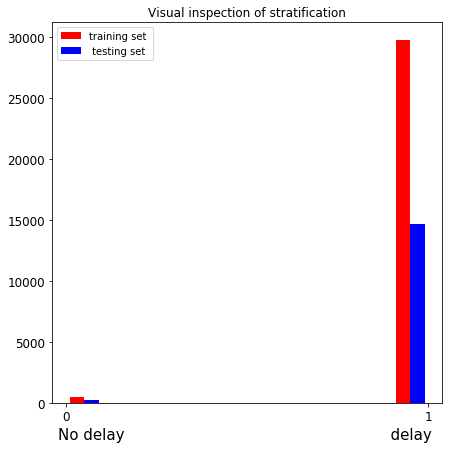

In [63]:
plt.figure(figsize = (7, 7))
matplotlib.rc('xtick', labelsize = 12) 
matplotlib.rc('ytick', labelsize = 12) 
plt.title("Visual inspection of stratification")
plt.xticks([0,1])
plt.xlabel('No delay                                                        delay ', fontsize = 15 )
plt.hist([y_train, y_test], color=['red', 'blue'], label=['training set ',' testing set'])
plt.legend(loc='best')
plt.show()

## Model learning

In [64]:
model = linear_model.LogisticRegression(solver='lbfgs')

In [65]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
model.intercept_

array([8.5299948])

In [67]:
model.coef_

array([[ 4.90790829e-02,  1.25658767e+01,  6.03311894e-02,
        -2.18276782e-03,  4.70885003e-02, -3.05541783e-02,
        -7.86958723e-03, -5.82339156e-02, -2.60995201e-02,
        -2.68324722e-01,  1.66379250e-01, -1.86619328e-01,
         2.52870554e-01,  3.64399362e-02,  3.34655481e-02,
        -1.40924837e-01, -4.81297162e-02,  4.74150376e-02,
        -3.25820731e-02, -3.67521391e-02, -4.32427030e-02,
         5.60851700e-02,  4.84709167e-02, -1.02366586e-01,
         3.55862687e-02, -5.56892492e-02, -3.04213311e-02]])

## Evaluation

In [68]:
y_test_predicted = model.predict(X_test)

In [69]:
accuracy = metrics.accuracy_score(y_test, y_test_predicted)
accuracy

0.986343760511268

In [70]:
precision = metrics.precision_score(y_test, y_test_predicted)
precision

0.9868527508090615

In [71]:
recall = metrics.recall_score(y_test, y_test_predicted)
recall

0.999453738477296

In [72]:
f1 = metrics.f1_score(y_test, y_test_predicted)
f1

0.99311327475659

In [73]:
y_train_predicted = model.predict(X_train)

In [74]:
y_train_predicted[:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [75]:
train_score = metrics.accuracy_score(y_train, y_train_predicted)
test_score = metrics.accuracy_score(y_test, y_test_predicted)

In [76]:
print("Accuracy at the training set: {train}\nAccuracy at the test set: {test}".format(train=train_score, test=test_score))

Accuracy at the training set: 0.9867126147320985
Accuracy at the test set: 0.986343760511268


In [77]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.76      0.11      0.20       220
           1       0.99      1.00      0.99     14645

    accuracy                           0.99     14865
   macro avg       0.87      0.56      0.60     14865
weighted avg       0.98      0.99      0.98     14865



In [78]:
metrics.confusion_matrix(y_test, y_test_predicted)

array([[   25,   195],
       [    8, 14637]], dtype=int64)

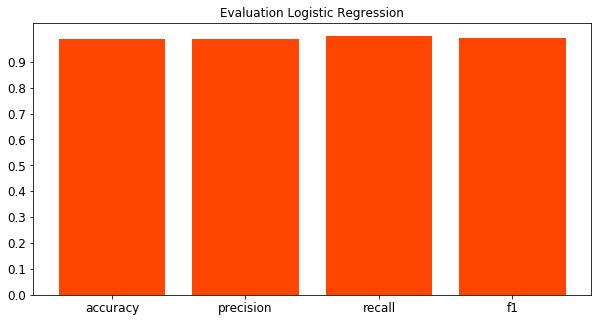

In [79]:
fig = plt.figure(figsize=(10, 5))
plt.bar(['accuracy', 'precision', 'recall', 'f1'], [accuracy , precision, recall, f1], color='orangered')
plt.title("Evaluation Logistic Regression")
plt.yticks(np.arange(0, 1, 0.1)) 
plt.show()

# Neural networks

In [80]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.layers import Dropout
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection
from keras import optimizers
from keras import losses

In [81]:
np.random.seed(7)

## Creating Neural networks

I will create a neural network with advance propagation. <br> The neural network will have an input layer, three hidden layers with, respectively, 100, 40 and 20 neurons, and an output layer. <br> The number of input layer neurons corresponds to the number of attributes of the data set, which is 27. <br> The number of output layer neurons is 1 since it is a binary classification. <br> In hidden layers I will use relu activation function and in the latter sigmoid function. <br> Optimizer Adam will be used. <br> Binary cross entropy as a function of error will be used. <br> Since the task of classification metrics will be accuracy. <br> I will use Dropout regularization for reducing overfitting and improving the generalization. 

In [82]:
number_of_features = X_train.shape[1]
output_size = 1

In [83]:
number_of_features

27

In [84]:
model = Sequential()
model.add(Dense(units = 100, input_dim = number_of_features, activation = 'relu'))
model.add(Dense(units = 40, activation = 'relu'))
model.add(Dense(units = 20, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = output_size, activation = 'sigmoid'))

In [85]:
model.compile( optimizers.Adam(learning_rate = 0.0001), loss = losses.BinaryCrossentropy(), metrics = ['accuracy'] )

In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               2800      
_________________________________________________________________
dense_9 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_10 (Dense)             (None, 20)                820       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [87]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose = 1, validation_split = 0.2)

Epoch 1/50
755/755 [==============================] - 5s 6ms/step - loss: 0.2207 - accuracy: 0.9349 - val_loss: 0.0800 - val_accuracy: 0.9853
Epoch 2/50
755/755 [==============================] - 4s 6ms/step - loss: 0.0818 - accuracy: 0.9851 - val_loss: 0.0741 - val_accuracy: 0.9853
Epoch 3/50
755/755 [==============================] - 3s 4ms/step - loss: 0.0762 - accuracy: 0.9851 - val_loss: 0.0703 - val_accuracy: 0.9853
Epoch 4/50
755/755 [==============================] - 3s 4ms/step - loss: 0.0729 - accuracy: 0.9851 - val_loss: 0.0674 - val_accuracy: 0.9853
Epoch 5/50
755/755 [==============================] - 3s 4ms/step - loss: 0.0695 - accuracy: 0.9851 - val_loss: 0.0655 - val_accuracy: 0.9853
Epoch 6/50
755/755 [==============================] - 3s 4ms/step - loss: 0.0669 - accuracy: 0.9851 - val_loss: 0.0636 - val_accuracy: 0.9853
Epoch 7/50
755/755 [==============================] - 3s 4ms/step - loss: 0.0649 - accuracy: 0.9851 - val_loss: 0.0617 - val_accuracy: 0.9853
Epoch 

In [89]:
epochs = history.epoch

loss = history.history['loss']
validation_loss = history.history['val_loss']

acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

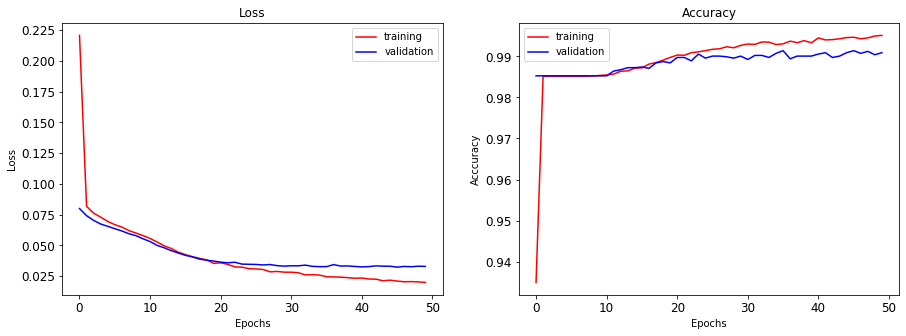

In [90]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='blue', label='validation')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='blue', label='validation')
plt.legend(loc='best')

## Neural network evaluation

In [91]:
final_model = Sequential()
final_model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
final_model.add(Dense(units=40, activation='relu'))
final_model.add(Dense(units=20, activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(units=output_size, activation='sigmoid'))
final_model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [92]:
history = final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose = 1)

Epoch 1/50
944/944 [==============================] - 6s 6ms/step - loss: 0.2167 - accuracy: 0.9324
Epoch 2/50
944/944 [==============================] - 4s 5ms/step - loss: 0.0798 - accuracy: 0.9852: 0s - loss: 0.0810 - ac
Epoch 3/50
944/944 [==============================] - 5s 6ms/step - loss: 0.0746 - accuracy: 0.9852
Epoch 4/50
944/944 [==============================] - 5s 5ms/step - loss: 0.0714 - accuracy: 0.9852
Epoch 5/50
944/944 [==============================] - 5s 5ms/step - loss: 0.0683 - accuracy: 0.9852
Epoch 6/50
944/944 [==============================] - 7s 7ms/step - loss: 0.0651 - accuracy: 0.9852
Epoch 7/50
944/944 [==============================] - 6s 6ms/step - loss: 0.0612 - accuracy: 0.9852
Epoch 8/50
944/944 [==============================] - 3s 4ms/step - loss: 0.0592 - accuracy: 0.9854
Epoch 9/50
944/944 [==============================] - 5s 6ms/step - loss: 0.0553 - accuracy: 0.9857
Epoch 10/50
944/944 [==============================] - 3s 3ms/step - loss: 0

In [93]:
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_accuracy))

465/465 [==============================] - 2s 3ms/step - loss: 0.0349 - accuracy: 0.9879
Test loss: 0.034854330122470856, test accuracy: 0.9878910183906555


In [94]:
train_loss, train_accuracy = final_model.evaluate(X_train, y_train)
print ("Train loss: {}, train accuracy: {}".format(train_loss, train_accuracy))

944/944 [==============================] - 4s 4ms/step - loss: 0.0167 - accuracy: 0.9967
Train loss: 0.016689864918589592, train accuracy: 0.9966864585876465


In [95]:
epochs = history.epoch
loss = history.history['loss']
acc = history.history['accuracy']

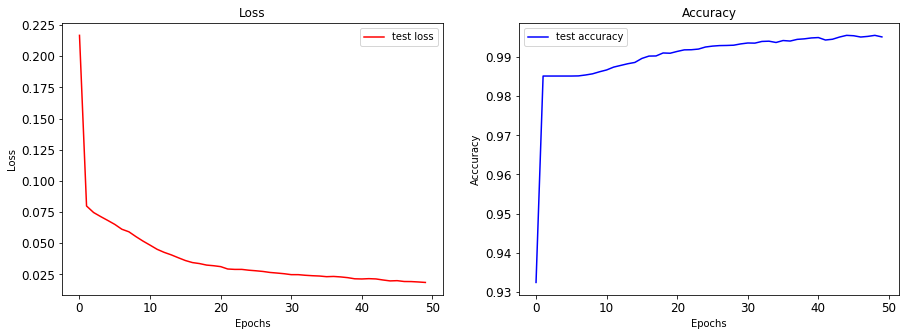

In [96]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, c='red', label='test loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acccuracy')
plt.plot(epochs, acc, c='blue', label = 'test accuracy')
plt.legend(loc='best')

### Oversampling 
Since the data is not balanced I will do Oversampling

In [97]:
oversampling_set = data[data['Delay'] == 0.0]

In [98]:
data_balanced  = data

In [99]:
for x in range(50):
    oversampling_set  = shuffle(oversampling_set)
    data_balanced = data_balanced.append(oversampling_set)
    data_balanced  = shuffle(data_balanced )

In [100]:
data_balanced  = shuffle(data_balanced )

In [101]:
print("Without delay ", data_balanced[data_balanced['Delay']==0].shape[0])
print("With delay ", data_balanced[data_balanced['Delay']==1].shape[0])

Without delay  34068
With delay  44376


In [102]:
data_balanced['Delay'].value_counts()

1    44376
0    34068
Name: Delay, dtype: int64

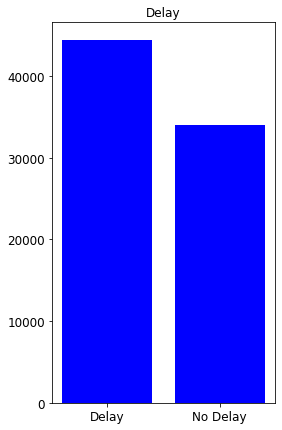

In [103]:
plt.figure(figsize=(4, 7))
plt.bar(['Delay', 'No Delay'], data_balanced['Delay'].value_counts().values, color='blue')
plt.title("Delay")
plt.show()

In [104]:
data_balanced

,Route,Min Gap,Vehicle,Delay,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
7612,511,0,4190,1,0,1,0,0,0,0,...,0,0,0,0,1,0,2014,9,30,6
15808,504,8,4049,1,1,0,0,0,0,0,...,0,0,0,0,0,0,2015,6,12,8
35083,504,0,4077,0,0,1,0,0,0,0,...,0,0,0,0,0,1,2017,2,1,18
6866,506,0,4028,0,0,0,1,0,0,0,...,0,0,0,0,1,0,2014,9,9,9
34782,501,11,1601,1,0,0,0,1,0,0,...,0,0,0,0,0,1,2017,1,25,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21274,510,12,4124,1,0,1,0,0,0,0,...,0,1,0,0,0,0,2016,1,2,8
21714,505,14,4045,1,1,0,0,0,0,0,...,0,0,0,0,0,1,2016,1,13,5
17680,505,0,4074,0,0,0,0,1,0,0,...,0,0,0,0,1,0,2015,8,18,14
42516,504,18,4023,1,0,0,0,1,0,0,...,0,0,1,0,0,0,2017,10,22,22


In [105]:
data_balanced.describe() 

,Route,Min Gap,Vehicle,Delay,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
count,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,...,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000
mean,502.700487,11.364986,4299.540908,0.565703,0.386505,0.104355,0.093965,0.415175,0.023291,0.028173,...,0.139896,0.112654,0.101002,0.172390,0.157998,0.147443,2015.573556,6.374254,15.879621,10.750433
std,26.667264,29.411028,1433.941371,0.495667,0.486952,0.305722,0.291782,0.492755,0.150826,0.165468,...,0.346881,0.316171,0.301333,0.377722,0.364742,0.354549,1.059206,3.400198,8.883369,5.436824
min,301.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000
25%,504.000000,0.000000,4076.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,4.000000,8.000000,6.000000
50%,505.000000,8.000000,4152.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,6.000000,16.000000,10.000000
75%,510.000000,14.000000,4227.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,9.000000,24.000000,15.000000
max,512.000000,4216.000000,163242.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2017.000000,12.000000,31.000000,23.000000


In [106]:
feature_names = data_balanced.columns
# for col in feature_names:
#     print(col)

In [107]:
corrcoefs = data_balanced.corr()['Delay']
corrcoefs

Route                            -0.034926
Min Gap                           0.278729
Vehicle                           0.004735
Delay                             1.000000
Direction_e                       0.048985
Direction_n                      -0.087057
Direction_s                      -0.077461
Direction_w                       0.051473
Incident_Diversion               -0.073416
Incident_Emergency Services       0.006497
Incident_General Delay           -0.174988
Incident_Held By                  0.144867
Incident_Investigation           -0.056236
Incident_Late Leaving Garage      0.077048
Incident_Mechanical               0.061083
Incident_Overhead - Pantograph    0.008277
Incident_Utilized Off Route      -0.080581
Day_Friday                       -0.032804
Day_Monday                        0.024392
Day_Saturday                      0.001048
Day_Sunday                       -0.002310
Day_Thursday                     -0.020291
Day_Tuesday                      -0.001645
Day_Wednesd

In [108]:
# corrcoefs_for_barh = ( (corrcoefs.drop('Delay')) * 1000000 ).astype(int)
corrcoefs_for_barh = corrcoefs.drop('Delay')
corrcoefs_for_barh


Route                            -0.034926
Min Gap                           0.278729
Vehicle                           0.004735
Direction_e                       0.048985
Direction_n                      -0.087057
Direction_s                      -0.077461
Direction_w                       0.051473
Incident_Diversion               -0.073416
Incident_Emergency Services       0.006497
Incident_General Delay           -0.174988
Incident_Held By                  0.144867
Incident_Investigation           -0.056236
Incident_Late Leaving Garage      0.077048
Incident_Mechanical               0.061083
Incident_Overhead - Pantograph    0.008277
Incident_Utilized Off Route      -0.080581
Day_Friday                       -0.032804
Day_Monday                        0.024392
Day_Saturday                      0.001048
Day_Sunday                       -0.002310
Day_Thursday                     -0.020291
Day_Tuesday                      -0.001645
Day_Wednesday                     0.035115
Year       

IndexError: arrays used as indices must be of integer (or boolean) type

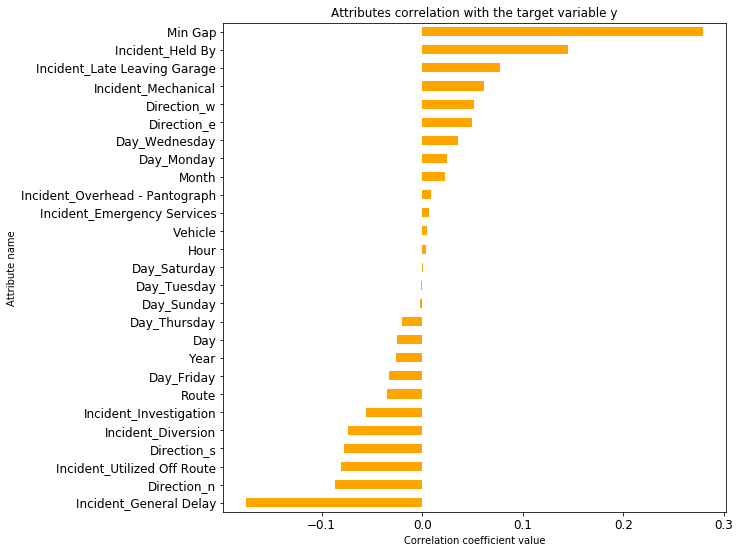

In [109]:
number_of_features = len(data_balanced.columns)

coefs_for_plot = pd.Series(corrcoefs_for_barh).sort_values()
coefs_for_plot.plot(kind = "barh", color = 'orange', figsize = (9, 9))

plt.title("Attributes correlation with the target variable y" )
plt.ylabel('Attribute name')
plt.xlabel('Correlation coefficient value')
plt.yticks(np.arange(number_of_features), list(feature_names[coefs_for_plot.index]))
plt.plot()

In [110]:
y = data_balanced['Delay']
X = data_balanced.drop(columns=['Delay'])

In [111]:
X.corr()

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
Route,1.000000,-0.090835,-0.000206,-0.007527,0.056262,0.065490,-0.066248,-0.068125,-0.115807,0.066561,...,0.025761,-0.076482,-0.057406,0.022075,-0.004348,0.038360,-0.015195,-0.024061,-0.011307,-0.001935
Min Gap,-0.090835,1.000000,-0.012631,-0.012296,-0.051257,-0.036179,0.065376,0.088779,0.088769,-0.056070,...,0.000389,0.008964,0.024205,-0.025578,0.016828,-0.002881,-0.009246,0.013451,-0.018059,-0.006272
Vehicle,-0.000206,-0.012631,1.000000,0.029031,0.025599,-0.014690,-0.035873,-0.020570,0.012695,-0.044952,...,0.008296,0.021635,0.024436,-0.040605,-0.002598,-0.002825,-0.108997,0.031157,-0.001586,0.013271
Direction_e,-0.007527,-0.012296,0.029031,1.000000,-0.270932,-0.255613,-0.668767,-0.017383,-0.018855,0.150019,...,0.020339,-0.020828,-0.035471,-0.006980,0.028255,0.020282,-0.043491,-0.033423,-0.016545,-0.024280
Direction_n,0.056262,-0.051257,0.025599,-0.270932,1.000000,-0.109926,-0.287601,-0.025340,-0.025106,-0.072576,...,-0.014808,-0.009256,-0.007168,-0.043958,0.018935,0.016469,0.031135,-0.037375,-0.034034,0.029090
Direction_s,0.065490,-0.036179,-0.014690,-0.255613,-0.109926,1.000000,-0.271340,-0.008306,0.020948,-0.069629,...,-0.007579,0.009898,0.009934,-0.016505,-0.002708,0.022575,0.043613,0.032938,0.010645,0.029907
Direction_w,-0.066248,0.065376,-0.035873,-0.668767,-0.287601,-0.271340,1.000000,0.037818,0.021805,-0.061993,...,-0.006424,0.020465,0.033618,0.043944,-0.038067,-0.043629,-0.002163,0.036714,0.031163,-0.011764
Incident_Diversion,-0.068125,0.088779,-0.020570,-0.017383,-0.025340,-0.008306,0.037818,1.000000,-0.026292,-0.043165,...,-0.005748,0.045228,0.047816,-0.036912,-0.032596,0.004201,0.024028,0.008930,-0.021989,0.003933
Incident_Emergency Services,-0.115807,0.088769,0.012695,-0.018855,-0.025106,0.020948,0.021805,-0.026292,1.000000,-0.047593,...,0.002627,0.058491,-0.008236,-0.006116,0.007778,-0.029954,0.000469,0.033781,0.020867,0.014830
Incident_General Delay,0.066561,-0.056070,-0.044952,0.150019,-0.072576,-0.069629,-0.061993,-0.043165,-0.047593,1.000000,...,-0.011242,-0.052943,0.004047,0.024207,-0.006500,0.013977,-0.077786,-0.015583,0.014625,-0.039306


In [112]:
number_of_features = X.shape[1]

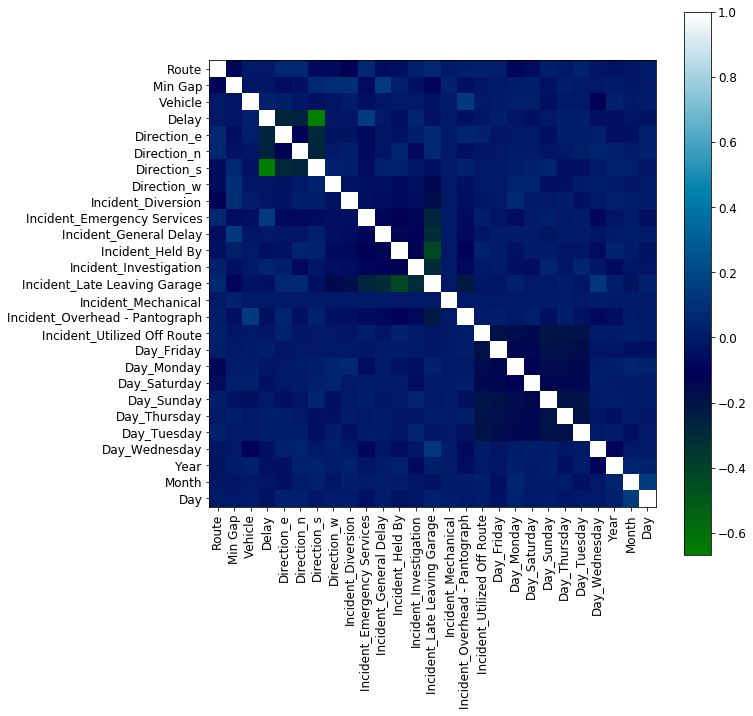

In [113]:
plt.figure(figsize = (10, 10))
plt.xticks(range(0, number_of_features), feature_names, rotation='vertical')
plt.yticks(range(0, number_of_features), feature_names)
plt.imshow(X.corr(), cmap='ocean')
plt.colorbar()
plt.show()

# Logistic regression

In [114]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

In [115]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 7, stratify = y)

In [116]:
X_train.shape

(52557, 27)

In [117]:
X_test.shape

(25887, 27)

In [118]:
 y_train.shape
    

(52557,)

In [119]:
y_test.shape

(25887,)

In [120]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
wd_train = np.sum(y_train == 0)
d_train = np.sum(y_train == 1)
print('Train Delay: ', d_train, '     Train Without Delay: ', wd_train)

Train Delay:  29732      Train Without Delay:  22825


In [122]:
wd_test = np.sum(y_test == 0)
d_test = np.sum(y_test == 1)
print('Test Delay: ', d_test, '     Test Without Delay: ', wd_test)

Test Delay:  14644      Test Without Delay:  11243


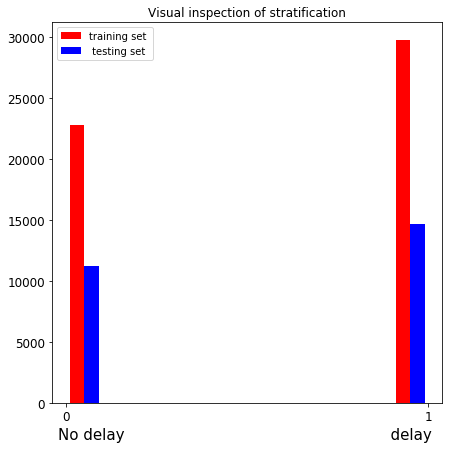

In [123]:
plt.figure(figsize = (7, 7))
matplotlib.rc('xtick', labelsize = 12) 
matplotlib.rc('ytick', labelsize = 12) 
plt.title("Visual inspection of stratification")
plt.xticks([0,1])
plt.xlabel('No delay                                                        delay ', fontsize = 15 )
plt.hist([y_train, y_test], color=['red', 'blue'], label=['training set ',' testing set'])
plt.legend(loc='best')
plt.show()

## Model learning

In [124]:
model = linear_model.LogisticRegression(solver='lbfgs')

In [125]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
model.intercept_

array([1.4270589])

In [127]:
model.coef_

array([[ 2.44740938e-01,  8.15960031e+00, -6.38730536e-03,
         7.67678217e-02, -6.96427118e-02, -4.09649060e-02,
        -8.26101754e-03, -2.43019356e-01, -2.21664151e-01,
        -2.41417202e-01,  7.44242648e-02, -1.05001040e-01,
         2.32997961e-01,  1.77756597e-01,  7.41219202e-02,
        -7.05116802e-03, -9.06699464e-03,  3.41975469e-02,
        -3.87929716e-02, -5.28210258e-02,  1.45075522e-02,
        -1.31644725e-02,  5.35833103e-02, -1.22083375e-01,
         3.56497175e-02, -1.76945274e-02,  8.85600129e-03]])

## Evaluation

In [128]:
y_test_predicted = model.predict(X_test)

In [129]:
accuracy = metrics.accuracy_score(y_test, y_test_predicted)
accuracy

0.9361069262564221

In [130]:
precision = metrics.precision_score(y_test, y_test_predicted)
precision

0.9390293362173854

In [131]:
recall = metrics.recall_score(y_test, y_test_predicted)
recall

0.9486479104069926

In [132]:
f1 = metrics.f1_score(y_test, y_test_predicted)
f1

0.9438141178069163

In [133]:
y_train_predicted = model.predict(X_train)

In [134]:
y_train_predicted[:30]

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [135]:
train_score = metrics.accuracy_score(y_train, y_train_predicted)
test_score = metrics.accuracy_score(y_test, y_test_predicted)

In [136]:
print("Accuracy at the training set: {train}\nAccuracy at the test set: {test}".format(train=train_score, test=test_score))

Accuracy at the training set: 0.9337290941263771
Accuracy at the test set: 0.9361069262564221


In [137]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11243
           1       0.94      0.95      0.94     14644

    accuracy                           0.94     25887
   macro avg       0.94      0.93      0.93     25887
weighted avg       0.94      0.94      0.94     25887



In [138]:
metrics.confusion_matrix(y_test, y_test_predicted)

array([[10341,   902],
       [  752, 13892]], dtype=int64)

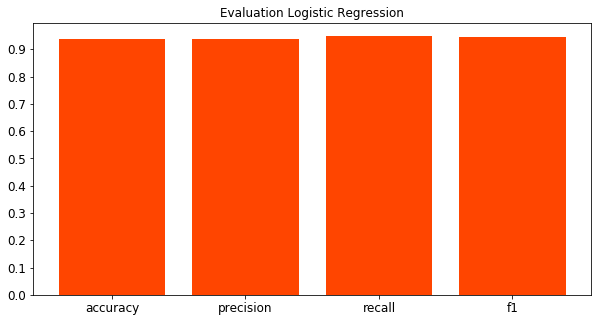

In [139]:
fig = plt.figure(figsize=(10, 5))
plt.bar(['accuracy', 'precision', 'recall', 'f1'], [accuracy , precision, recall, f1], color='orangered')
plt.title("Evaluation Logistic Regression")
plt.yticks(np.arange(0, 1, 0.1)) 
plt.show()

# Neural networks

In [140]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.layers import Dropout
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection


In [141]:
np.random.seed(7)

## Creating Neural networks

I will create a neural network with advance propagation. <br> The neural network will have an input layer, three hidden layers with, respectively, 100, 40 and 20 neurons, and an output layer. <br> The number of input layer neurons corresponds to the number of attributes of the data set, which is 27. <br> The number of output layer neurons is 1 since it is a binary classification. <br> In hidden layers I will use relu activation function and in the latter sigmoid function. <br> Optimizer Adam will be used. <br> Binary cross entropy as a function of error will be used. <br> Since the task of classification metrics will be accuracy. <br> I will use Dropout regularization for reducing overfitting and improving the generalization. 

In [142]:
number_of_features = X_train.shape[1]
output_size = 1

In [143]:
number_of_features

27

In [144]:
model = Sequential()
model.add(Dense(units = 100, input_dim = number_of_features, activation = 'relu'))
model.add(Dense(units = 40, activation = 'relu'))
model.add(Dense(units = 20, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = output_size, activation = 'sigmoid'))

In [145]:
model.compile( optimizers.Adam(learning_rate = 0.0001), loss = losses.BinaryCrossentropy(), metrics = ['accuracy'] )

In [146]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               2800      
_________________________________________________________________
dense_17 (Dense)             (None, 40)                4040      
_________________________________________________________________
dense_18 (Dense)             (None, 20)                820       
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 21        
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [147]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose = 1, validation_split = 0.2)

Epoch 1/50
1314/1314 [==============================] - 6s 5ms/step - loss: 0.5923 - accuracy: 0.6894 - val_loss: 0.4792 - val_accuracy: 0.7956
Epoch 2/50
1314/1314 [==============================] - 8s 6ms/step - loss: 0.3718 - accuracy: 0.8729 - val_loss: 0.2781 - val_accuracy: 0.9212
Epoch 3/50
1314/1314 [==============================] - 6s 4ms/step - loss: 0.2432 - accuracy: 0.9331 - val_loss: 0.2089 - val_accuracy: 0.9439
Epoch 4/50
1314/1314 [==============================] - 6s 5ms/step - loss: 0.1925 - accuracy: 0.9460 - val_loss: 0.1750 - val_accuracy: 0.9503
Epoch 5/50
1314/1314 [==============================] - 6s 5ms/step - loss: 0.1639 - accuracy: 0.9517 - val_loss: 0.1514 - val_accuracy: 0.9536
Epoch 6/50
1314/1314 [==============================] - 6s 5ms/step - loss: 0.1422 - accuracy: 0.9547 - val_loss: 0.1377 - val_accuracy: 0.9580
Epoch 7/50
1314/1314 [==============================] - 7s 6ms/step - loss: 0.1282 - accuracy: 0.9589 - val_loss: 0.1254 - val_accuracy:

In [148]:
epochs = history.epoch

loss = history.history['loss']
validation_loss = history.history['val_loss']

acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

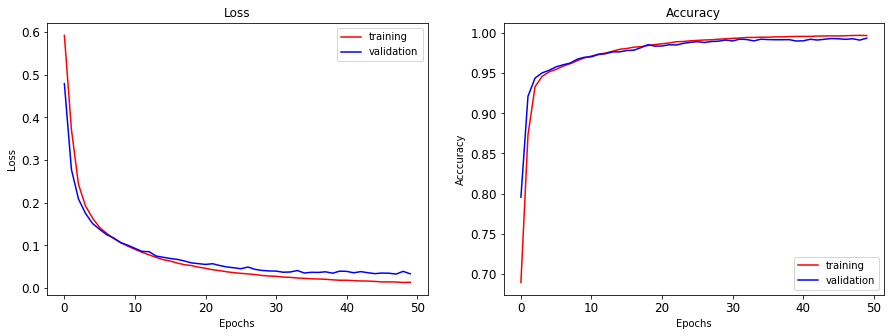

In [149]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='blue', label='validation')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='blue', label='validation')
plt.legend(loc='best')

## Neural network evaluation

In [150]:
final_model = Sequential()
final_model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
final_model.add(Dense(units=40, activation='relu'))
final_model.add(Dense(units=20, activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(units=output_size, activation='sigmoid'))
final_model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [151]:
history = final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose = 1)

Epoch 1/50
1643/1643 [==============================] - 8s 5ms/step - loss: 0.5453 - accuracy: 0.7362
Epoch 2/50
1643/1643 [==============================] - 8s 5ms/step - loss: 0.3014 - accuracy: 0.9141
Epoch 3/50
1643/1643 [==============================] - 6s 4ms/step - loss: 0.2119 - accuracy: 0.9431
Epoch 4/50
1643/1643 [==============================] - 6s 4ms/step - loss: 0.1747 - accuracy: 0.9502
Epoch 5/50
1643/1643 [==============================] - 6s 4ms/step - loss: 0.1509 - accuracy: 0.9539
Epoch 6/50
1643/1643 [==============================] - 5s 3ms/step - loss: 0.1339 - accuracy: 0.9580
Epoch 7/50
1643/1643 [==============================] - 6s 3ms/step - loss: 0.1205 - accuracy: 0.9608
Epoch 8/50
1643/1643 [==============================] - 5s 3ms/step - loss: 0.1112 - accuracy: 0.9632
Epoch 9/50
1643/1643 [==============================] - 5s 3ms/step - loss: 0.1029 - accuracy: 0.9652
Epoch 10/50
1643/1643 [==============================] - 6s 3ms/step - loss: 0.094

In [152]:
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_accuracy))

809/809 [==============================] - 3s 3ms/step - loss: 0.0385 - accuracy: 0.9932
Test loss: 0.03846949711441994, test accuracy: 0.9932398796081543


In [153]:
train_loss, train_accuracy = final_model.evaluate(X_train, y_train)
print ("Train loss: {}, train accuracy: {}".format(train_loss, train_accuracy))

1643/1643 [==============================] - 6s 3ms/step - loss: 0.0132 - accuracy: 0.9975
Train loss: 0.013154169544577599, train accuracy: 0.9975264668464661


In [154]:
epochs = history.epoch
loss = history.history['loss']
acc = history.history['accuracy']

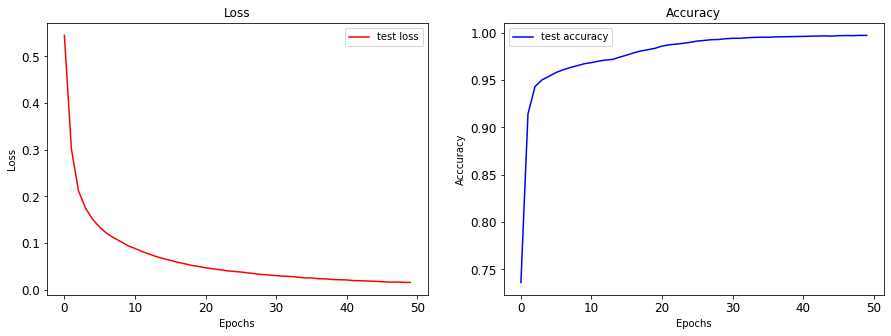

In [155]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, c='red', label='test loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acccuracy')
plt.plot(epochs, acc, c='blue', label = 'test accuracy')
plt.legend(loc='best')

## Save model

In [156]:
from keras.models import load_model

In [157]:
model.save('final_model.h5') 